In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("/home/aarush/Downloads/car_price (1).csv")
data

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [2]:
data.describe()
data2=data.drop(['name', 'seller_type', 'torque', 'max_power'],axis=1)

In [3]:
column_titles = ['selling_price','year','km_driven','fuel','transmission','owner','mileage','engine','seats']
data2=data2.reindex(columns=column_titles)


In [4]:
data2['mileage'] = data2.mileage.str.split(" ",expand=True)
data2['engine'] = data2.engine.str.split(" ",expand=True)

In [5]:

data2['owner'] = data2.owner.str.replace("First Owner" , "5")
data2['owner'] = data2.owner.str.replace("Second Owner" , "4")
data2['owner'] = data2.owner.str.replace("Third Owner" , "3")
data2['owner'] = data2.owner.str.replace("Fourth & Above Owner" , "2")
data2['owner'] = data2.owner.str.replace("Test Drive Car" , "1")

In [6]:
data2['transmission'] = data2.transmission.str.replace("Manual", "1")
data2['transmission'] = data2.transmission.str.replace("Automatic", "2")
data2['fuel'] = data2.fuel.str.replace("LPG", "1")
data2['fuel'] = data2.fuel.str.replace("CNG", "2")
data2['fuel'] = data2.fuel.str.replace("Diesel", "3")
data2['fuel'] = data2.fuel.str.replace("Petrol", "4")

In [7]:
data2['seats']=data2['seats'].astype(str)
data2['mileage']=data2['mileage'].astype(str)
data2['engine']=data2['engine'].astype(str)

data2['mileage'] = data2.mileage.str.strip()
data2['engine'] = data2.engine.str.strip()
data2['seats'] = data2.seats.str.strip()


data2['year']=data2['year'].astype(float)
data2['selling_price']=data2['selling_price'].astype(float)
data2['km_driven']=data2['km_driven'].astype(float)
data2['fuel']=data2['fuel'].astype(float)
data2['transmission']=data2['transmission'].astype(float)
data2['owner']=data2['owner'].astype(float)
data2['mileage']=data2['mileage'].astype(float)
data2['engine']=data2['engine'].astype(float)
data2['seats']=data2['seats'].astype(float)


In [8]:

data2=data2.dropna()


In [9]:
x=data2[['year','km_driven','fuel','transmission','owner','mileage','engine','seats']].values
y=data2['selling_price']
y=np.array(y)
y=y.reshape((-1,1))

In [10]:
x = (x - x.mean())/x.std()


In [11]:
weights=np.zeros((9,1))

In [12]:
    
def update_weights_vectorized(x, y, weights, learning_rate):
   
    companies = len(x)

    #1 - Get Predictions
    predictions = predict(x, weights)

    #2 - Calculate error/loss
    error = y - predictions

    gradient = np.dot(-x.T,  error)

    #4 Take the average error derivative for each feature
    gradient /= companies

    #5 - Multiply the gradient by our learning rate
    gradient *= learning_rate

    #6 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights


In [13]:
def cost_function(x, y, weights):
    
   
    
    
    N = len(y)

    predictions = predict(x, weights)

    # Matrix math lets use do this without looping
    sq_error = (predictions - y)**2

    # Return average squared error among predictions
    return 1.0/(2*N) * sq_error.sum()

In [14]:
bias = np.ones(shape=(len(x),1))
x = np.append(bias, x, axis=1)


In [15]:
def predict(x, weights):
    
    

    predictions = np.dot(x, weights)
    return predictions

In [16]:
def train(x, y, weights, bias, learning_rate, iters):
    cost_history = []
    iterations = []

    for i in range(iters):
        weights = update_weights_vectorized(x, y, weights,learning_rate)

       
        cost = cost_function(x, y, weights)
        cost_history.append(cost)
        iterations.append(i)

        
        if i % 500 == 0:
            print (cost)

    return weights, cost_history ,iterations

In [17]:
p,r,o = train(x,y,weights,bias,0.002,5000)
p

538880146537.86816
353955264889.92615
325701221809.2012
318112395704.3369
316050302934.6342
315466299493.4945
315277613616.8765
315194668173.31244
315140018474.5744
315092952658.94385


array([[ 545374.22429266],
       [-126836.37062404],
       [ -95469.96542933],
       [-163384.60252039],
       [-163345.51186428],
       [-163301.39616854],
       [-163232.25258522],
       [ -71331.04044164],
       [-163300.01842085]])

Text(0.5, 1.0, 'Minimizing Cost Function with Interations')

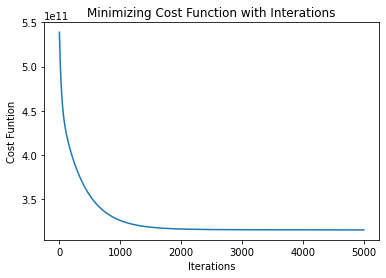

In [18]:
plt.plot(o,r)
plt.xlabel("Iterations")
plt.ylabel("Cost Funtion")
plt.title("Minimizing Cost Function with Interations")

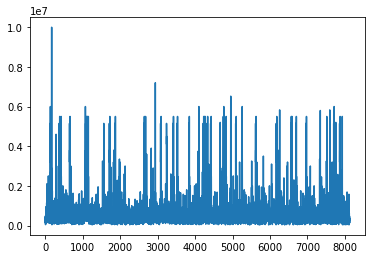

In [19]:
plt.plot(data2.selling_price)